In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('../dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory data analysis (EDA)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
cat = df.select_dtypes(exclude=['int',float])
print(cat.columns)

Index(['sex', 'smoker', 'region'], dtype='object')


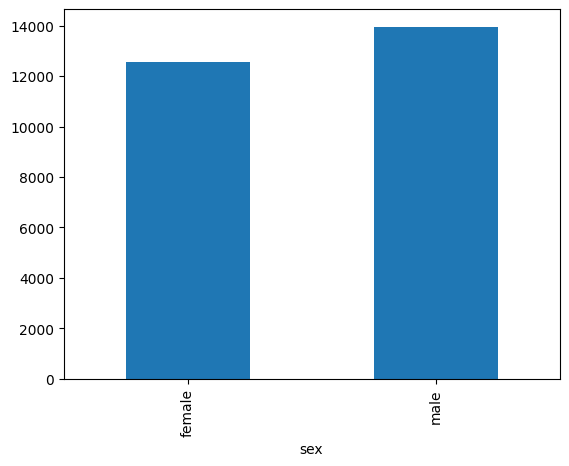

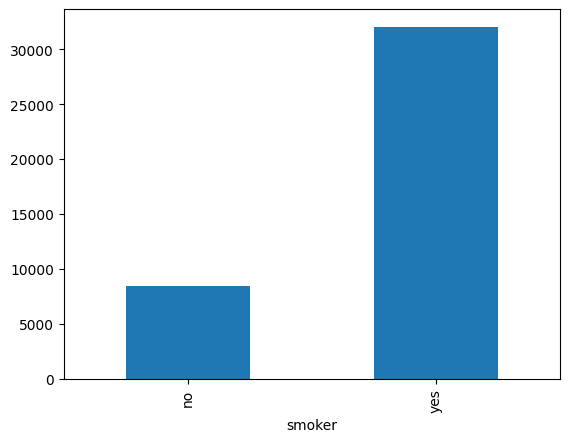

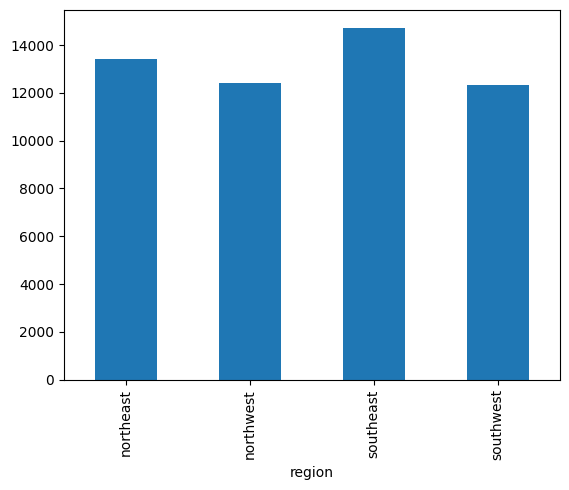

In [10]:
for k in cat:
    if k != 'charges':
        df.groupby(k)['charges'].mean().plot(kind='bar')
        plt.show()

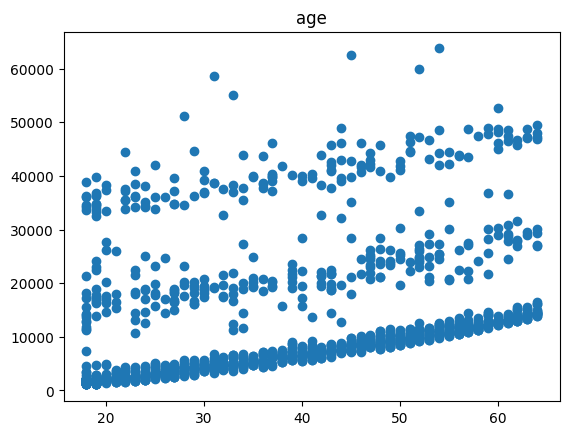

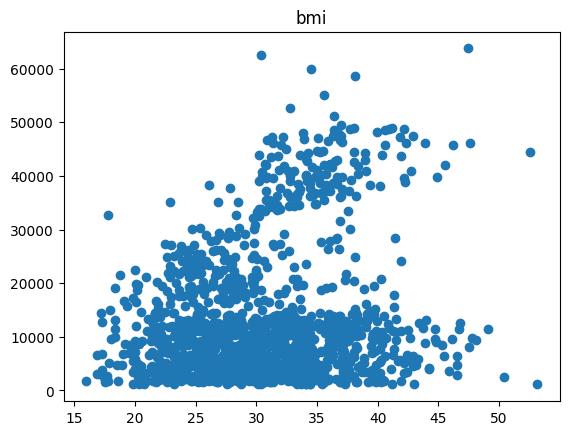

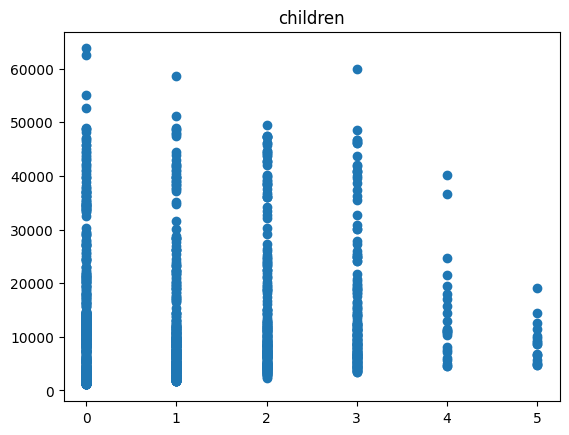

In [12]:
num = df.select_dtypes(exclude=['object'])
for k in num:
    if k != 'charges':
        plt.scatter(df[k], df['charges'])
        plt.title(k)
        plt.show()

### Distribution Data

C:\Users\MSI\AppData\Local\Temp\ipykernel_8020\2441203380.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


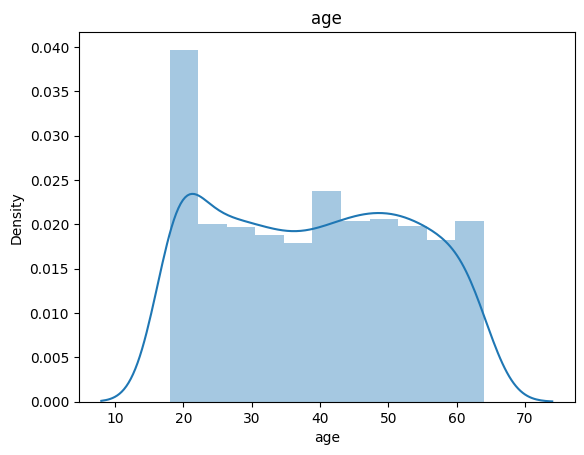

C:\Users\MSI\AppData\Local\Temp\ipykernel_8020\2441203380.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


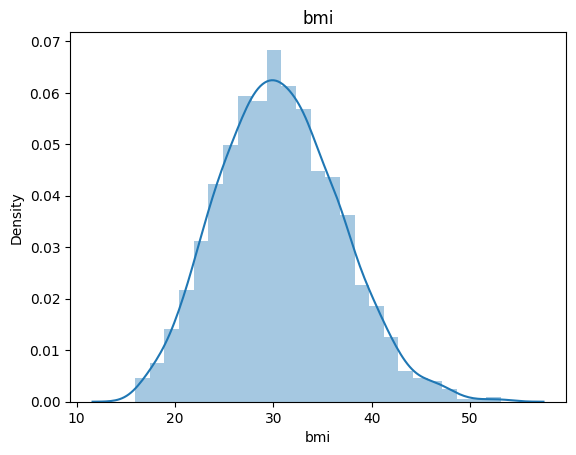

C:\Users\MSI\AppData\Local\Temp\ipykernel_8020\2441203380.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


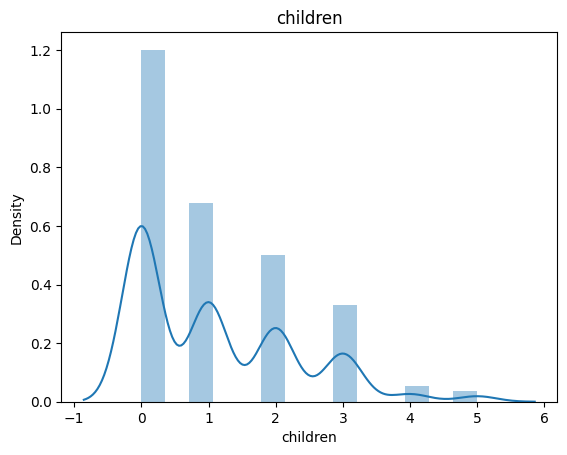

In [13]:
for k in num:
    if k != 'charges':
        sns.distplot(df[k])
        plt.title(k)
        plt.show()

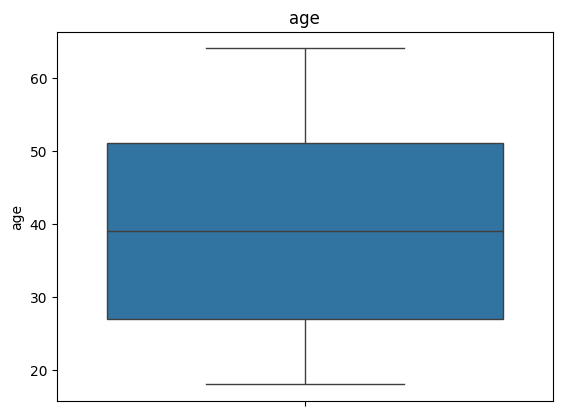

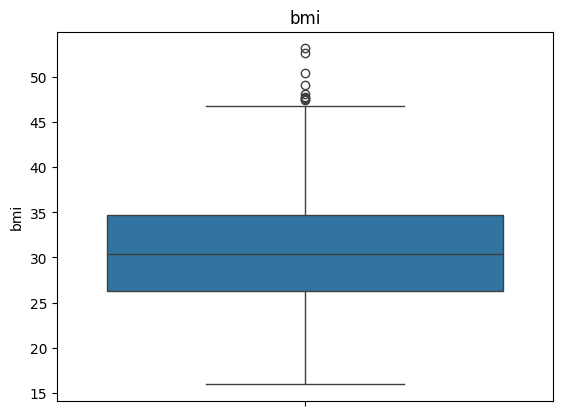

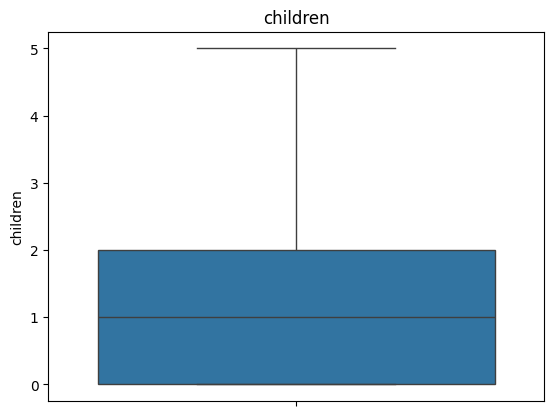

In [14]:
for k in num:
    if k != 'charges':
        sns.boxplot(df[k])
        plt.title(k)
        plt.show()

### Feature Enginering

In [15]:
df[cat.columns].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [16]:
ins = df.copy()
ins['sex'] = np.where(ins['sex']=='male', 1, 0)
ins['smoker'] = np.where(ins['smoker']=='yes', 1, 0)
ordinal = {k: i for i, k in enumerate(ins['region'].unique(),0)}
ins['region'] = ins['region'].map(ordinal)
ins[cat.columns].head()

,sex,smoker,region
0,0,1,0
1,1,0,1
2,1,0,1
3,1,0,2
4,1,0,2


In [17]:
ins['region'].unique()

array([0, 1, 2, 3])

In [18]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Feature Selection

In [19]:
from sklearn.feature_selection import chi2

In [21]:
feat_cat = ins.drop(num.columns,axis=1)
feat_cat['children'] = ins['children'].values
y = ins['charges'].astype(int)
feat_cat.head()

,sex,smoker,region,children
0,0,1,0,0
1,1,0,1,1
2,1,0,1,3
3,1,0,2,0
4,1,0,2,0


In [22]:
chi = chi2(feat_cat, y)
chi

(array([ 655.07248521, 1059.11678832, 1066.60725076, 1752.13651877]),
 array([1.00000000e+00, 9.99998656e-01, 9.99996987e-01, 3.77773444e-17]))

In [23]:
p_values = pd.Series(chi[1])
p_values.index = feat_cat.columns
p_values

sex         1.000000e+00
smoker      9.999987e-01
region      9.999970e-01
children    3.777734e-17
dtype: float64

In [24]:
feat_num = ins[num.columns]
feat_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [25]:
feat_num.drop('children', axis=1).corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


In [26]:
f_ins = ins[[ 'age', 'children', 'smoker', 'region', 'charges']]
f_ins.head()

,age,children,smoker,region,charges
0,19,0,1,0,16884.92400
1,18,1,0,1,1725.55230
2,28,3,0,1,4449.46200
3,33,0,0,2,21984.47061
4,32,0,0,2,3866.85520


### Model Building and Validation

In [27]:
from sklearn.model_selection import train_test_split

x = f_ins.drop(['charges'],axis=1)
y = f_ins['charges']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [29]:
#from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
from sklearn.metrics import r2_score
pred = lr.predict(x_test)
r2_score(y_test,pred)

0.7152158584622994

In [31]:
output = pd.DataFrame({'actual_charges':y_test,'predicted_charges':pred})
output.head()

,actual_charges,predicted_charges
843,27533.91290,36333.894238
67,6389.37785,8578.507732
488,48885.13561,32830.526570
778,5934.37980,8271.972882
129,6082.40500,8598.219352
